In [2]:
import numpy as np
import pandas as pd

## 基本功能

### 查询基本信息

In [5]:
index = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=['A', 'B', 'C'])
df

,A,B,C
2000-01-01,-0.877025,0.578100,-0.495682
2000-01-02,1.204134,0.429446,1.580609
2000-01-03,-1.523974,-1.163261,0.748757
2000-01-04,1.657345,0.531942,2.156428
2000-01-05,-0.752988,0.010039,2.844673
2000-01-06,0.751757,0.520563,-0.704476
2000-01-07,0.058400,-0.423074,0.202966
2000-01-08,-0.463587,-0.195046,0.413324


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2000-01-01 to 2000-01-08
Freq: D
Data columns (total 3 columns):
A    8 non-null float64
B    8 non-null float64
C    8 non-null float64
dtypes: float64(3)
memory usage: 256.0 bytes


### 快速查看头和尾

In [7]:
long_series = pd.Series(np.random.randn(1000))

In [8]:
long_series.head()

0    2.052048
1    0.315303
2    0.215232
3    0.219239
4   -0.784686
dtype: float64

In [9]:
long_series.tail(3)

997    0.198896
998   -1.199332
999   -0.150073
dtype: float64

### 属性和原始数组

In [19]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [20]:
s.shape

(5,)

In [21]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [22]:
df.shape

(8, 3)

In [23]:
df.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08'],
              dtype='datetime64[ns]', freq='D')

In [24]:
df.columns

Index(['a', 'b', 'c'], dtype='object')

index和columns是可以安全地修改的

In [25]:
df.columns = ["a", "b", "c"]

In [26]:
df

,a,b,c
2000-01-01,-0.877025,0.578100,-0.495682
2000-01-02,1.204134,0.429446,1.580609
2000-01-03,-1.523974,-1.163261,0.748757
2000-01-04,1.657345,0.531942,2.156428
2000-01-05,-0.752988,0.010039,2.844673
2000-01-06,0.751757,0.520563,-0.704476
2000-01-07,0.058400,-0.423074,0.202966
2000-01-08,-0.463587,-0.195046,0.413324


如果想得到原始数据，可以使用.values属性，series将返回一维数组，DataFrame将返回二维数组

In [28]:
s.values

array([ 2.33010968,  1.90139661,  1.47269255,  0.94138611, -1.61930089])

In [29]:
df.values

array([[-0.87702538,  0.57810001, -0.4956819 ],
       [ 1.20413361,  0.42944628,  1.58060931],
       [-1.52397427, -1.16326057,  0.74875732],
       [ 1.65734524,  0.53194187,  2.15642801],
       [-0.75298771,  0.01003886,  2.84467262],
       [ 0.75175663,  0.52056256, -0.70447635],
       [ 0.05840006, -0.42307393,  0.20296612],
       [-0.46358734, -0.19504564,  0.41332373]])

 ### 算术运算中的广播

In [30]:
df = pd.DataFrame({'one' : pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
                   'two' : pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
                   'three' : pd.Series(np.random.randn(3), index=['b', 'c', 'd'])})
  

In [34]:
df

,one,two,three
a,-2.058637,-1.356699,NaN
b,0.204574,-1.938237,-0.115592
c,0.463307,-0.099773,1.338462
d,NaN,1.380254,-0.068492


In [35]:
row = df.iloc[1]

In [36]:
row

one      0.204574
two     -1.938237
three   -0.115592
Name: b, dtype: float64

In [37]:
column = df['two']

In [38]:
column

a   -1.356699
b   -1.938237
c   -0.099773
d    1.380254
Name: two, dtype: float64

In [39]:
df.sub(row, axis='columns')

,one,two,three
a,-2.263211,0.581538,NaN
b,0.000000,0.000000,0.000000
c,0.258733,1.838464,1.454053
d,NaN,3.318491,0.047100


In [40]:
df.sub(row, axis=1)

,one,two,three
a,-2.263211,0.581538,NaN
b,0.000000,0.000000,0.000000
c,0.258733,1.838464,1.454053
d,NaN,3.318491,0.047100


In [41]:
df.sub(column, axis='index')

,one,two,three
a,-0.701938,0.0,NaN
b,2.142811,0.0,1.822646
c,0.563080,0.0,1.438235
d,NaN,0.0,-1.448746


In [42]:
df.sub(column, axis=0)

,one,two,three
a,-0.701938,0.0,NaN
b,2.142811,0.0,1.822646
c,0.563080,0.0,1.438235
d,NaN,0.0,-1.448746


在Series和DataFrame的算术函数可以选择输入fill_value，即当缺少某个位置的一个值时要替换的值。例如，在添加两个DataFrame对象时，可能希望将NaN视为0，除非两个DataFrame都缺少该值，在这种情况下，结果将是NaN（fillna如果您愿意，您可以稍后使用其他值替换NaN ）。

In [43]:
df

,one,two,three
a,-2.058637,-1.356699,NaN
b,0.204574,-1.938237,-0.115592
c,0.463307,-0.099773,1.338462
d,NaN,1.380254,-0.068492


In [48]:
df2 = df.copy() # 注意一定要copy！！！
df2.loc["a", "three"] = 1
df2

,one,two,three
a,-2.058637,-1.356699,1.000000
b,0.204574,-1.938237,-0.115592
c,0.463307,-0.099773,1.338462
d,NaN,1.380254,-0.068492


In [49]:
df + df2

,one,two,three
a,-4.117274,-2.713398,NaN
b,0.409147,-3.876475,-0.231184
c,0.926613,-0.199546,2.676923
d,NaN,2.760507,-0.136984


In [50]:
df.add(df2, fill_value=0)

,one,two,three
a,-4.117274,-2.713398,1.000000
b,0.409147,-3.876475,-0.231184
c,0.926613,-0.199546,2.676923
d,NaN,2.760507,-0.136984


\> < >= <= == != 对应的函数分别是 gt lt ge le eq ne不加赘述

### 布尔缩减

In [52]:
tmp_bool = df > 0

In [53]:
tmp_bool

,one,two,three
a,False,False,False
b,True,False,False
c,True,False,True
d,False,True,False


In [54]:
tmp_bool.all(axis=0)

one      False
two      False
three    False
dtype: bool

In [55]:
tmp_bool.all(axis=1)

a    False
b    False
c    False
d    False
dtype: bool

In [56]:
tmp_bool.all(axis=None)

False

In [57]:
tmp_bool.any(axis=0)

one      True
two      True
three    True
dtype: bool

In [58]:
tmp_bool.any(axis=1)

a    False
b     True
c     True
d     True
dtype: bool

In [59]:
tmp_bool.any(axis=None)

True

可以通过empty属性测试pandas对象是否为空。

In [60]:
df

,one,two,three
a,-2.058637,-1.356699,NaN
b,0.204574,-1.938237,-0.115592
c,0.463307,-0.099773,1.338462
d,NaN,1.380254,-0.068492


In [61]:
df.empty

False

In [62]:
df2 = pd.DataFrame(columns=list('ABC'))

In [63]:
df2

,A,B,C


In [64]:
df2.empty

True

### 比较对象是否相等

In [65]:
df

,one,two,three
a,-2.058637,-1.356699,NaN
b,0.204574,-1.938237,-0.115592
c,0.463307,-0.099773,1.338462
d,NaN,1.380254,-0.068492


In [66]:
df + df

,one,two,three
a,-4.117274,-2.713398,NaN
b,0.409147,-3.876475,-0.231184
c,0.926613,-0.199546,2.676923
d,NaN,2.760507,-0.136984


In [67]:
df*2

,one,two,three
a,-4.117274,-2.713398,NaN
b,0.409147,-3.876475,-0.231184
c,0.926613,-0.199546,2.676923
d,NaN,2.760507,-0.136984


In [74]:
df + df == df*2

,one,two,three
a,True,True,False
b,True,True,True
c,True,True,True
d,False,True,True


In [75]:
(df + df == df*2).all(axis=None)

False

为什么会出现False呢？因为nan不等于nan

In [71]:
np.nan == np.nan

False

pandas提供了.equals方法，该方法比较的时候将nan视为相等

In [73]:
(df+df).equals(df*2)

True

请注意，Series或DataFrame索引的顺序必须相同才能为True：

In [76]:
df1 = pd.DataFrame({'col':['foo', 0, np.nan]})

In [77]:
df1

,col
0,foo
1,0
2,NaN


In [78]:
df2 = pd.DataFrame({'col':[np.nan, 0, 'foo']}, index=[2,1,0])

In [79]:
df2

,col
2,NaN
1,0
0,foo


In [80]:
df1.equals(df2)

False

In [81]:
df1.equals(df2.sort_index())

True

### 与array_like对象的比较

与数值的比较是非常简单的

In [83]:
pd.Series(['foo', 'bar', 'baz']) == 'foo'

0     True
1    False
2    False
dtype: bool

In [87]:
pd.Index(['foo', 'bar', 'baz']) == 'foo'

array([ True, False, False])

相同长度，不同类型的数据比较也是可以的

In [85]:
 pd.Series(['foo', 'bar', 'baz']) == pd.Index(['foo', 'bar', 'qux'])

0     True
1     True
2    False
dtype: bool

In [86]:
pd.Series(['foo', 'bar', 'baz']) == np.array(['foo', 'bar', 'qux'])

0     True
1     True
2    False
dtype: bool

In [ ]:
尝试比较不同长度的Index或Series对象将引发ValueError：

In [90]:
 pd.Series(['foo', 'bar', 'baz']) == pd.Series(['foo', 'bar'])

ValueError: Can only compare identically-labeled Series objects

In [91]:
pd.Series(['foo', 'bar', 'baz']) == pd.Series(['foo'])

ValueError: Can only compare identically-labeled Series objects

### 合并有重叠数据的数据集

有时候需要合并两个相似数据集的，其中一个中的值优先于另一个。一个例子是代表特定经济指标的两个数据，其中一个被认为具有“更高质量”（统计口径更好，更准确）。但是，较低质量的数据完整度更高，因此，我们希望组合两个DataFrame对象，能用高质量的数据就用高质量的数据，高质量数据缺失时才用低质量数据填充，实现此操作的函数是combine_first()

In [92]:
df1 = pd.DataFrame({'A' : [1., np.nan, 3., 5., np.nan],
                    'B' : [np.nan, 2., 3., np.nan, 6.]})

In [93]:
df2 = pd.DataFrame({'A' : [5., 2., 4., np.nan, 3., 7.],
                    'B' : [np.nan, np.nan, 3., 4., 6., 8.]})

In [94]:
df1

,A,B
0,1.0,NaN
1,NaN,2.0
2,3.0,3.0
3,5.0,NaN
4,NaN,6.0


In [95]:
df2

,A,B
0,5.0,NaN
1,2.0,NaN
2,4.0,3.0
3,NaN,4.0
4,3.0,6.0
5,7.0,8.0


In [96]:
df1.combine_first(df2)

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,8.0


如果想自定义两个DataFrame合并的逻辑，调用DataFrame.combine()，文档链接http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.combine.html#pandas.DataFrame.combine, 在此不再赘述

### 描述性统计

pandas支持几乎所有的描述性统计方法,下面我们主要以DataFrame为例讲解，Series的诸多方法基本与DataFrame逻辑一样

In [104]:
df

,one,two,three
a,-2.058637,-1.356699,NaN
b,0.204574,-1.938237,-0.115592
c,0.463307,-0.099773,1.338462
d,NaN,1.380254,-0.068492


所有的方法都支持axis参数，可以自由的按列统计和按行统计(默认是axis=0)

In [107]:
df.sum()

one     -1.390757
two     -2.014456
three    1.154378
dtype: float64

In [102]:
df.sum(axis=1)

a   -3.415336
b   -1.849256
c    1.701995
d    1.311762
dtype: float64

In [100]:
df.mean(axis=0)

one     -0.463586
two     -0.503614
three    0.384793
dtype: float64

In [101]:
df.mean(axis=1)

a   -1.707668
b   -0.616419
c    0.567332
d    0.655881
dtype: float64

所有这些方法都有一个skipna选项，用于表名是否排除缺失数据（默认为True）

In [110]:
df.mean()

one     -0.463586
two     -0.503614
three    0.384793
dtype: float64

In [134]:
df.mean(skipna=False)

one           NaN
two     -0.503614
three         NaN
dtype: float64

std函数支持自由度选项，默认自由度减去1，也就是除以n-1

In [137]:
df.std()

one      1.387400
two      1.471727
three    0.826237
dtype: float64

In [138]:
df.std(ddof=0)

one      1.132807
two      1.274553
three    0.674620
dtype: float64

结合dataframe的算术运算和广播，可以很轻松地描述各种统计过程，如标准化

In [112]:
df

,one,two,three
a,-2.058637,-1.356699,NaN
b,0.204574,-1.938237,-0.115592
c,0.463307,-0.099773,1.338462
d,NaN,1.380254,-0.068492


In [113]:
df.mean()

one     -0.463586
two     -0.503614
three    0.384793
dtype: float64

In [114]:
df.std()

one      1.387400
two      1.471727
three    0.826237
dtype: float64

In [123]:
df - df.mean()

,one,two,three
a,-1.595051,-0.853085,NaN
b,0.668159,-1.434623,-0.500384
c,0.926892,0.403841,0.953669
d,NaN,1.883868,-0.453285


In [119]:
ts_stand = (df - df.mean()) / df.std()
ts_stand

,one,two,three
a,-1.149670,-0.579649,NaN
b,0.481591,-0.974789,-0.605618
c,0.668079,0.274399,1.154231
d,NaN,1.280039,-0.548613


In [121]:
ts_stand.std()

one      1.0
two      1.0
three    1.0
dtype: float64

上面是将每列标准化，如果将每行标准化，则需要这样做

In [127]:
df.mean(axis=1)

a   -1.707668
b   -0.616419
c    0.567332
d    0.655881
dtype: float64

In [128]:
df.std(1)

a    0.496345
b    1.155868
c    0.724738
d    1.024418
dtype: float64

In [124]:
df.sub(df.mean(axis=1), axis=0)

,one,two,three
a,-0.350969,0.350969,NaN
b,0.820992,-1.321819,0.500827
c,-0.104025,-0.667105,0.771130
d,NaN,0.724373,-0.724373


In [131]:
xs_stand = df.sub(df.mean(1), axis=0).div(df.std(1), axis=0)
xs_stand

,one,two,three
a,-0.707107,0.707107,NaN
b,0.710282,-1.143573,0.433291
c,-0.143535,-0.920477,1.064011
d,NaN,0.707107,-0.707107


In [139]:
xs_stand.std(1)

a    1.0
b    1.0
c    1.0
d    1.0
dtype: float64

cumsum()和cumprod()在根据收益率计算指数点位的时候非常有用

In [161]:
sim_ret = pd.DataFrame(np.random.randn(10, 10),
                       index=pd.date_range("2018-10-01", periods=10), 
                       columns=["000001.SZ", "000002.SZ", "000003.SZ", "000004.SZ", "000005.SZ", "000006.SZ", "000007.SZ", "000008.SZ", "000009.SZ", "000010.SZ"])/100
sim_ret

,000001.SZ,000002.SZ,000003.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ
2018-10-01,0.005679,-0.004090,0.007055,-0.017585,-0.004799,0.012054,-0.002250,0.005856,-0.001902,0.002823
2018-10-02,0.013872,-0.004448,0.017916,-0.004242,0.006120,0.007005,0.015573,0.005672,0.006074,-0.005518
2018-10-03,-0.005454,-0.002074,0.002222,-0.009948,-0.000781,0.019879,-0.001510,-0.012444,-0.001126,-0.007964
2018-10-04,-0.008246,-0.007559,0.003086,0.008370,-0.007475,-0.002190,-0.013135,0.006522,0.003356,-0.011418
2018-10-05,0.018312,0.009903,0.003254,-0.010896,-0.004635,0.001458,-0.009837,-0.002144,-0.007351,-0.005000
2018-10-06,-0.016343,0.000658,0.005048,0.007946,0.008919,0.001533,-0.000599,-0.008445,0.001245,0.014982
2018-10-07,0.017936,-0.001179,0.000780,-0.003822,0.007867,0.005045,0.006617,-0.004708,0.005941,-0.000840
2018-10-08,-0.000596,0.003565,0.001636,-0.007108,0.002488,-0.025396,-0.019253,-0.011616,0.000447,0.000986
2018-10-09,-0.018501,-0.001872,-0.009720,0.015137,-0.011178,0.010475,0.000487,-0.011337,-0.006114,0.004314
2018-10-10,0.010298,0.017816,0.002511,-0.011229,0.003893,0.008592,0.002775,0.007171,0.000574,-0.007034


In [169]:
(1 + sim_ret).cumprod()

,000001.SZ,000002.SZ,000003.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ
2018-10-01,1.005679,0.995910,1.007055,0.982415,0.995201,1.012054,0.997750,1.005856,0.998098,1.002823
2018-10-02,1.019630,0.991480,1.025097,0.978247,1.001292,1.019144,1.013288,1.011561,1.004161,0.997290
2018-10-03,1.014069,0.989424,1.027375,0.968515,1.000509,1.039403,1.011758,0.998974,1.003030,0.989348
2018-10-04,1.005707,0.981945,1.030545,0.976621,0.993030,1.037126,0.998469,1.005489,1.006396,0.978051
2018-10-05,1.024124,0.991670,1.033898,0.965980,0.988428,1.038639,0.988646,1.003333,0.998997,0.973161
2018-10-06,1.007386,0.992322,1.039117,0.973656,0.997243,1.040231,0.988054,0.994860,1.000241,0.987741
2018-10-07,1.025454,0.991152,1.039927,0.969935,1.005089,1.045479,0.994592,0.990175,1.006183,0.986911
2018-10-08,1.024843,0.994686,1.041628,0.963041,1.007589,1.018929,0.975443,0.978674,1.006633,0.987885
2018-10-09,1.005882,0.992824,1.031504,0.977618,0.996326,1.029602,0.975918,0.967578,1.000479,0.992147
2018-10-10,1.016241,1.010512,1.034094,0.966641,1.000204,1.038449,0.978626,0.974516,1.001053,0.985168


quantile可以用来计算分位数,在指数编制时经常需要进行诸如“剔除流动性后20%的股票”这样的操作，quantile可以迅速计算分位数

In [170]:
sim_ret.quantile(0.2, axis=1)

2018-10-01   -0.004232
2018-10-02   -0.004283
2018-10-03   -0.008361
2018-10-04   -0.008880
2018-10-05   -0.007849
2018-10-06   -0.002168
2018-10-07   -0.001708
2018-10-08   -0.013143
2018-10-09   -0.011210
2018-10-10   -0.000947
Freq: D, Name: 0.2, dtype: float64

In [175]:
sim_ret.ge(sim_ret.quantile(0.2,  axis=1), axis=0)

,000001.SZ,000002.SZ,000003.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ
2018-10-01,True,True,True,False,False,True,True,True,True,True
2018-10-02,True,False,True,True,True,True,True,True,True,False
2018-10-03,True,True,True,False,True,True,True,False,True,True
2018-10-04,True,True,True,True,True,True,False,True,True,False
2018-10-05,True,True,True,False,True,True,False,True,True,True
2018-10-06,False,True,True,True,True,True,True,False,True,True
2018-10-07,True,True,True,False,True,True,True,False,True,True
2018-10-08,True,True,True,True,True,False,False,True,True,True
2018-10-09,False,True,True,True,True,True,True,False,True,True
2018-10-10,True,True,True,False,True,True,True,True,True,False


In [177]:
sim_ret.quantile([0.2, 0.4], axis=1)

,2018-10-01 00:00:00,2018-10-02 00:00:00,2018-10-03 00:00:00,2018-10-04 00:00:00,2018-10-05 00:00:00,2018-10-06 00:00:00,2018-10-07 00:00:00,2018-10-08 00:00:00,2018-10-09 00:00:00,2018-10-10 00:00:00
0.2,-0.004232,-0.004283,-0.008361,-0.008880,-0.007849,-0.002168,-0.001708,-0.013143,-0.011210,-0.000947
0.4,-0.002041,0.005913,-0.003426,-0.007509,-0.004781,0.001010,0.000132,-0.003201,-0.007556,0.002670


quantile的功能远比我们想想的丰富，还可以选择分位数的产生方式，如11个数的20%分位数落在第二个和第三个数之间，通过更改interpolation参数可以选择线性插值，较大的数，较小的数，最近的数等等选项。

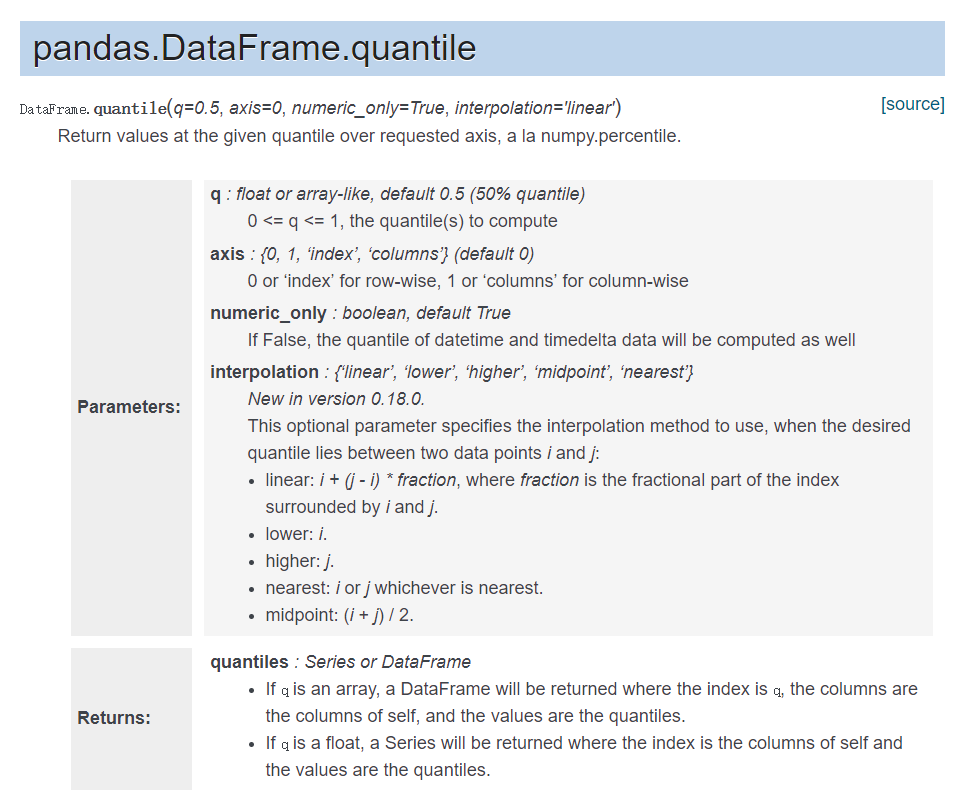

其实大部分的pandas函数都是这样，一般具有非常多的参数以实现不同的选项，但基本每个参数都设置了默认参数，平时调用时使用默认参数就好，需要实现进阶功能的时候就需要阅读相关文档

常用的描述性函数如下，在此不一一介绍

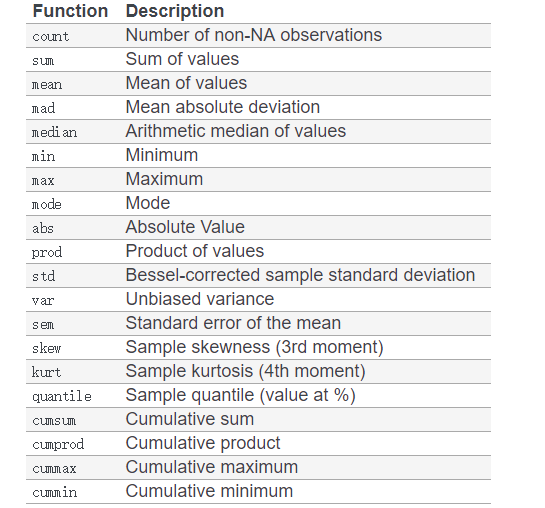

这些函数基本上都适用于Series

如果想简单的看以下数据的各种汇总统计,DataFrame提供了describe方法

In [180]:
sim_ret

,000001.SZ,000002.SZ,000003.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ
2018-10-01,0.005679,-0.004090,0.007055,-0.017585,-0.004799,0.012054,-0.002250,0.005856,-0.001902,0.002823
2018-10-02,0.013872,-0.004448,0.017916,-0.004242,0.006120,0.007005,0.015573,0.005672,0.006074,-0.005518
2018-10-03,-0.005454,-0.002074,0.002222,-0.009948,-0.000781,0.019879,-0.001510,-0.012444,-0.001126,-0.007964
2018-10-04,-0.008246,-0.007559,0.003086,0.008370,-0.007475,-0.002190,-0.013135,0.006522,0.003356,-0.011418
2018-10-05,0.018312,0.009903,0.003254,-0.010896,-0.004635,0.001458,-0.009837,-0.002144,-0.007351,-0.005000
2018-10-06,-0.016343,0.000658,0.005048,0.007946,0.008919,0.001533,-0.000599,-0.008445,0.001245,0.014982
2018-10-07,0.017936,-0.001179,0.000780,-0.003822,0.007867,0.005045,0.006617,-0.004708,0.005941,-0.000840
2018-10-08,-0.000596,0.003565,0.001636,-0.007108,0.002488,-0.025396,-0.019253,-0.011616,0.000447,0.000986
2018-10-09,-0.018501,-0.001872,-0.009720,0.015137,-0.011178,0.010475,0.000487,-0.011337,-0.006114,0.004314
2018-10-10,0.010298,0.017816,0.002511,-0.011229,0.003893,0.008592,0.002775,0.007171,0.000574,-0.007034


In [181]:
sim_ret.describe()

,000001.SZ,000002.SZ,000003.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.001696,0.001072,0.003379,-0.003338,0.000042,0.003846,-0.002113,-0.002547,0.000114,-0.001467
std,0.013607,0.007601,0.006759,0.010472,0.006881,0.012041,0.009985,0.008246,0.004493,0.007673
min,-0.018501,-0.007559,-0.009720,-0.017585,-0.011178,-0.025396,-0.019253,-0.012444,-0.007351,-0.011418
25%,-0.007548,-0.003586,0.001782,-0.010659,-0.004758,0.001477,-0.007941,-0.010614,-0.001708,-0.006655
50%,0.002541,-0.001525,0.002798,-0.005675,0.000853,0.006025,-0.001055,-0.003426,0.000511,-0.002920
75%,0.012978,0.002838,0.004599,0.005004,0.005563,0.010005,0.002203,0.005810,0.002828,0.002364
max,0.018312,0.017816,0.017916,0.015137,0.008919,0.019879,0.015573,0.007171,0.006074,0.014982


### Avoid For loops

In [188]:
sim_ret

,000001.SZ,000002.SZ,000003.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ
2018-10-01,0.005679,-0.004090,0.007055,-0.017585,-0.004799,0.012054,-0.002250,0.005856,-0.001902,0.002823
2018-10-02,0.013872,-0.004448,0.017916,-0.004242,0.006120,0.007005,0.015573,0.005672,0.006074,-0.005518
2018-10-03,-0.005454,-0.002074,0.002222,-0.009948,-0.000781,0.019879,-0.001510,-0.012444,-0.001126,-0.007964
2018-10-04,-0.008246,-0.007559,0.003086,0.008370,-0.007475,-0.002190,-0.013135,0.006522,0.003356,-0.011418
2018-10-05,0.018312,0.009903,0.003254,-0.010896,-0.004635,0.001458,-0.009837,-0.002144,-0.007351,-0.005000
2018-10-06,-0.016343,0.000658,0.005048,0.007946,0.008919,0.001533,-0.000599,-0.008445,0.001245,0.014982
2018-10-07,0.017936,-0.001179,0.000780,-0.003822,0.007867,0.005045,0.006617,-0.004708,0.005941,-0.000840
2018-10-08,-0.000596,0.003565,0.001636,-0.007108,0.002488,-0.025396,-0.019253,-0.011616,0.000447,0.000986
2018-10-09,-0.018501,-0.001872,-0.009720,0.015137,-0.011178,0.010475,0.000487,-0.011337,-0.006114,0.004314
2018-10-10,0.010298,0.017816,0.002511,-0.011229,0.003893,0.008592,0.002775,0.007171,0.000574,-0.007034


对每一个元素都进行元素级操作，DataFrame使用applymap函数，Series使用map函数

In [187]:
sim_ret.applymap(lambda x: "正收益" if x>0 else "负收益")

,000001.SZ,000002.SZ,000003.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ
2018-10-01,正收益,负收益,正收益,负收益,负收益,正收益,负收益,正收益,负收益,正收益
2018-10-02,正收益,负收益,正收益,负收益,正收益,正收益,正收益,正收益,正收益,负收益
2018-10-03,负收益,负收益,正收益,负收益,负收益,正收益,负收益,负收益,负收益,负收益
2018-10-04,负收益,负收益,正收益,正收益,负收益,负收益,负收益,正收益,正收益,负收益
2018-10-05,正收益,正收益,正收益,负收益,负收益,正收益,负收益,负收益,负收益,负收益
2018-10-06,负收益,正收益,正收益,正收益,正收益,正收益,负收益,负收益,正收益,正收益
2018-10-07,正收益,负收益,正收益,负收益,正收益,正收益,正收益,负收益,正收益,负收益
2018-10-08,负收益,正收益,正收益,负收益,正收益,负收益,负收益,负收益,正收益,正收益
2018-10-09,负收益,负收益,负收益,正收益,负收益,正收益,正收益,负收益,负收益,正收益
2018-10-10,正收益,正收益,正收益,负收益,正收益,正收益,正收益,正收益,正收益,负收益


In [190]:
s = sim_ret.iloc[:, 0]
s

2018-10-01    0.005679
2018-10-02    0.013872
2018-10-03   -0.005454
2018-10-04   -0.008246
2018-10-05    0.018312
2018-10-06   -0.016343
2018-10-07    0.017936
2018-10-08   -0.000596
2018-10-09   -0.018501
2018-10-10    0.010298
Freq: D, Name: 000001.SZ, dtype: float64

In [191]:
s.map(lambda x: "正收益" if x>0 else "负收益")

2018-10-01    正收益
2018-10-02    正收益
2018-10-03    负收益
2018-10-04    负收益
2018-10-05    正收益
2018-10-06    负收益
2018-10-07    正收益
2018-10-08    负收益
2018-10-09    负收益
2018-10-10    正收益
Freq: D, Name: 000001.SZ, dtype: object

如果想对某一列或某一行进行apply操作可以使用apply函数|
例如我想得到每一天最大收益率和最小收益率的差，可以这样写

In [192]:
sim_ret

,000001.SZ,000002.SZ,000003.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ
2018-10-01,0.005679,-0.004090,0.007055,-0.017585,-0.004799,0.012054,-0.002250,0.005856,-0.001902,0.002823
2018-10-02,0.013872,-0.004448,0.017916,-0.004242,0.006120,0.007005,0.015573,0.005672,0.006074,-0.005518
2018-10-03,-0.005454,-0.002074,0.002222,-0.009948,-0.000781,0.019879,-0.001510,-0.012444,-0.001126,-0.007964
2018-10-04,-0.008246,-0.007559,0.003086,0.008370,-0.007475,-0.002190,-0.013135,0.006522,0.003356,-0.011418
2018-10-05,0.018312,0.009903,0.003254,-0.010896,-0.004635,0.001458,-0.009837,-0.002144,-0.007351,-0.005000
2018-10-06,-0.016343,0.000658,0.005048,0.007946,0.008919,0.001533,-0.000599,-0.008445,0.001245,0.014982
2018-10-07,0.017936,-0.001179,0.000780,-0.003822,0.007867,0.005045,0.006617,-0.004708,0.005941,-0.000840
2018-10-08,-0.000596,0.003565,0.001636,-0.007108,0.002488,-0.025396,-0.019253,-0.011616,0.000447,0.000986
2018-10-09,-0.018501,-0.001872,-0.009720,0.015137,-0.011178,0.010475,0.000487,-0.011337,-0.006114,0.004314
2018-10-10,0.010298,0.017816,0.002511,-0.011229,0.003893,0.008592,0.002775,0.007171,0.000574,-0.007034


In [201]:
sim_ret.apply(lambda x: x.max()-x.min(), axis=1)

2018-10-01    0.029640
2018-10-02    0.023433
2018-10-03    0.032322
2018-10-04    0.021505
2018-10-05    0.029208
2018-10-06    0.031325
2018-10-07    0.022644
2018-10-08    0.028961
2018-10-09    0.033638
2018-10-10    0.029045
Freq: D, dtype: float64

apply函数可以理解为将每一行（或每一列作为一个Series传入给函数），得到的结果如果是数字，就返回一个series，如果是一个series，就返回一个DataFrame,这个相当智能，因为matlab的arrayfun，cellfun相对于这个功能就要差很多

In [200]:
sim_ret.apply(lambda x: pd.Series([x.max(), x.min()], index=["max", "min"]), axis=1)

,max,min
2018-10-01,0.012054,-0.017585
2018-10-02,0.017916,-0.005518
2018-10-03,0.019879,-0.012444
2018-10-04,0.008370,-0.013135
2018-10-05,0.018312,-0.010896
2018-10-06,0.014982,-0.016343
2018-10-07,0.017936,-0.004708
2018-10-08,0.003565,-0.025396
2018-10-09,0.015137,-0.018501
2018-10-10,0.017816,-0.011229


我们可以通过一个小技巧加深对于apply的理解,在传入apply的函数里添加打印语句

In [207]:
def fun(x):
    print(x, "\n\n")
    return pd.Series([x.max(), x.min()], index=["max", "min"])

In [208]:
sim_ret.apply(fun, axis=1)

000001.SZ    0.005679
000002.SZ   -0.004090
000003.SZ    0.007055
000004.SZ   -0.017585
000005.SZ   -0.004799
000006.SZ    0.012054
000007.SZ   -0.002250
000008.SZ    0.005856
000009.SZ   -0.001902
000010.SZ    0.002823
Name: 2018-10-01T00:00:00.000000000, dtype: float64 


000001.SZ    0.005679
000002.SZ   -0.004090
000003.SZ    0.007055
000004.SZ   -0.017585
000005.SZ   -0.004799
000006.SZ    0.012054
000007.SZ   -0.002250
000008.SZ    0.005856
000009.SZ   -0.001902
000010.SZ    0.002823
Name: 2018-10-01 00:00:00, dtype: float64 


000001.SZ    0.013872
000002.SZ   -0.004448
000003.SZ    0.017916
000004.SZ   -0.004242
000005.SZ    0.006120
000006.SZ    0.007005
000007.SZ    0.015573
000008.SZ    0.005672
000009.SZ    0.006074
000010.SZ   -0.005518
Name: 2018-10-02 00:00:00, dtype: float64 


000001.SZ   -0.005454
000002.SZ   -0.002074
000003.SZ    0.002222
000004.SZ   -0.009948
000005.SZ   -0.000781
000006.SZ    0.019879
000007.SZ   -0.001510
000008.SZ   -0.012444
000009.SZ   -0.0011

,max,min
2018-10-01,0.012054,-0.017585
2018-10-02,0.017916,-0.005518
2018-10-03,0.019879,-0.012444
2018-10-04,0.008370,-0.013135
2018-10-05,0.018312,-0.010896
2018-10-06,0.014982,-0.016343
2018-10-07,0.017936,-0.004708
2018-10-08,0.003565,-0.025396
2018-10-09,0.015137,-0.018501
2018-10-10,0.017816,-0.011229


我们发现每次都传入了一个Series作为参数

### 重新排序和更改标签

使用reindex方法可以轻松地重新排序

In [214]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a   -0.057188
b   -0.627052
c    0.816668
d    0.100119
e   -1.537925
dtype: float64

In [220]:
s.reindex(['e', 'b', 'f', 'd'])

e    0.502051
b    0.158536
f         NaN
d   -0.156847
dtype: float64

对于一个DataFrame，可以同时对index和columns进行reindex，也可以用axis参数对一条轴reindex

In [222]:
df

,one,two,three
a,-2.058637,-1.356699,NaN
b,0.204574,-1.938237,-0.115592
c,0.463307,-0.099773,1.338462
d,NaN,1.380254,-0.068492


In [223]:
df.reindex(index=['c', 'f', 'b'], columns=['three', 'two', 'one'])

,three,two,one
c,1.338462,-0.099773,0.463307
f,NaN,NaN,NaN
b,-0.115592,-1.938237,0.204574


In [224]:
df.reindex(['c', 'f', 'b'], axis=0)

,one,two,three
c,0.463307,-0.099773,1.338462
f,NaN,NaN,NaN
b,0.204574,-1.938237,-0.115592


In [ ]:
还有一种常用的方法，就是以另外一个DataFrame为样本进行reindex

In [227]:
df

,one,two,three
a,-2.058637,-1.356699,NaN
b,0.204574,-1.938237,-0.115592
c,0.463307,-0.099773,1.338462
d,NaN,1.380254,-0.068492


In [229]:
df2 = df.reindex(index=["b", "c"])
df2

,one,two,three
b,0.204574,-1.938237,-0.115592
c,0.463307,-0.099773,1.338462


In [230]:
df.reindex_like(df2)

,one,two,three
b,0.204574,-1.938237,-0.115592
c,0.463307,-0.099773,1.338462


如果想要删除某些行或列，可以使用drop方法

In [231]:
df

,one,two,three
a,-2.058637,-1.356699,NaN
b,0.204574,-1.938237,-0.115592
c,0.463307,-0.099773,1.338462
d,NaN,1.380254,-0.068492


In [232]:
df.drop(['a', 'd'], axis=0)

,one,two,three
b,0.204574,-1.938237,-0.115592
c,0.463307,-0.099773,1.338462


In [233]:
df.drop(['one'], axis=1)

,two,three
a,-1.356699,NaN
b,-1.938237,-0.115592
c,-0.099773,1.338462
d,1.380254,-0.068492


更改标签可以使用rename方法

In [237]:
df

,one,two,three
a,-2.058637,-1.356699,NaN
b,0.204574,-1.938237,-0.115592
c,0.463307,-0.099773,1.338462
d,NaN,1.380254,-0.068492


In [238]:
df.rename(columns={'one': 'foo', 'two': 'bar'},
          index={'a': 'apple', 'b': 'banana', 'd': 'durian'})

,foo,bar,three
apple,-2.058637,-1.356699,NaN
banana,0.204574,-1.938237,-0.115592
c,0.463307,-0.099773,1.338462
durian,NaN,1.380254,-0.068492


这里我们特意讲解一下inplace参数，大多数函数如果有inplace参数，默认都是False

In [241]:
df1 = df.copy()
df1

,one,two,three
a,-2.058637,-1.356699,NaN
b,0.204574,-1.938237,-0.115592
c,0.463307,-0.099773,1.338462
d,NaN,1.380254,-0.068492


In [242]:
df2 = df1.rename(columns={'one': 'foo', 'two': 'bar'},
                 index={'a': 'apple', 'b': 'banana', 'd': 'durian'},
                 inplace=False)

,foo,bar,three
apple,-2.058637,-1.356699,NaN
banana,0.204574,-1.938237,-0.115592
c,0.463307,-0.099773,1.338462
durian,NaN,1.380254,-0.068492


In [243]:
df1

,one,two,three
a,-2.058637,-1.356699,NaN
b,0.204574,-1.938237,-0.115592
c,0.463307,-0.099773,1.338462
d,NaN,1.380254,-0.068492


In [245]:
df2

,foo,bar,three
apple,-2.058637,-1.356699,NaN
banana,0.204574,-1.938237,-0.115592
c,0.463307,-0.099773,1.338462
durian,NaN,1.380254,-0.068492


改用inplace=True参数的话

In [258]:
df1 = df.copy()
df1

,one,two,three
a,-2.058637,-1.356699,NaN
b,0.204574,-1.938237,-0.115592
c,0.463307,-0.099773,1.338462
d,NaN,1.380254,-0.068492


In [259]:
df2 = df1.rename(columns={'one': 'foo', 'two': 'bar'},
                 index={'a': 'apple', 'b': 'banana', 'd': 'durian'},
                 inplace=True)

In [254]:
df1

,foo,bar,three
apple,-2.058637,-1.356699,NaN
banana,0.204574,-1.938237,-0.115592
c,0.463307,-0.099773,1.338462
durian,NaN,1.380254,-0.068492


In [255]:
df2 is None

True

如果选择inplace=True选项，那么rename这个操作将在原来的df1上进行，会更改df1，且方法返回None   
如果选择inplace=False选项，那么rename这个操作将不会更改原来的df1，而是返回一个新的DataFrame。新返回的DataFrame和旧DataFrame互不影响

基本上所有与修改DataFrame相关的函数都有inplace参数，供选择是在原来的df上直接修改，还是生成新的DataFrame

### 排序

#### 按index排序

In [265]:
df = pd.DataFrame({'one' : pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
                   'two' : pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
                   'three' : pd.Series(np.random.randn(3), index=['b', 'c', 'd'])})
   

In [266]:
unsorted_df = df.reindex(index=['a', 'd', 'c', 'b'],
                         columns=['three', 'two', 'one'])

In [270]:
unsorted_df

,three,two,one
a,NaN,0.655547,-1.138704
d,0.289626,0.785330,NaN
c,-0.806277,-0.500301,-0.878219
b,-0.455291,0.374566,-0.194116


按照index排序，使用sort_index方法（同样支持inplace用法）

In [272]:
unsorted_df.sort_index()

,three,two,one
a,NaN,0.655547,-1.138704
b,-0.455291,0.374566,-0.194116
c,-0.806277,-0.500301,-0.878219
d,0.289626,0.785330,NaN


默认是顺序排序，如果想倒序排列，需要将ascending参数改为False

In [276]:
unsorted_df.sort_index(ascending=False)

,three,two,one
d,0.289626,0.785330,NaN
c,-0.806277,-0.500301,-0.878219
b,-0.455291,0.374566,-0.194116
a,NaN,0.655547,-1.138704


按照columns排序也可以，不过要注意，字符串的排序是一个个按照首字符排序的

In [279]:
unsorted_df.sort_index(axis=1)

,one,three,two
a,-1.138704,NaN,0.655547
d,NaN,0.289626,0.785330
c,-0.878219,-0.806277,-0.500301
b,-0.194116,-0.455291,0.374566


series也有sort_index方法

In [280]:
unsorted_df['three'].sort_index()

a         NaN
b   -0.455291
c   -0.806277
d    0.289626
Name: three, dtype: float64

#### 按values排序

In [286]:
df1 = pd.DataFrame({'one':[2,1,1,1],'two':[1,3,2,4],'three':[5,4,3,2]})

In [282]:
df1

,one,two,three
0,2,1,5
1,1,3,4
2,1,2,3
3,1,4,2


In [289]:
df1

,one,two,three
0,2,1,5
1,1,3,4
2,1,2,3
3,1,4,2


按照'two'列排序

In [290]:
df1.sort_values(by='two')

,one,two,three
0,2,1,5
2,1,2,3
1,1,3,4
3,1,4,2


先按照'one'列排序，再按照'two'列排序

In [288]:
df1.sort_values(by=['one','two'])

,one,two,three
2,1,2,3
1,1,3,4
3,1,4,2
0,2,1,5


In [ ]:
先按照'one'列顺序排序，再按照'two'列倒序排序

In [292]:
df1.sort_values(by=['one','two'], ascending=[True, False])

,one,two,three
3,1,4,2
1,1,3,4
2,1,2,3
0,2,1,5


sort_values还可以处理NAN

In [293]:
s[2] = np.nan

In [294]:
s

a    0.887863
b    0.158536
c         NaN
d   -0.156847
e    0.502051
dtype: float64

In [295]:
s.sort_values()

d   -0.156847
b    0.158536
e    0.502051
a    0.887863
c         NaN
dtype: float64

In [296]:
s.sort_values(na_position='first')

c         NaN
d   -0.156847
b    0.158536
e    0.502051
a    0.887863
dtype: float64

### dtypes

In [297]:
 dft = pd.DataFrame(dict(A = np.random.rand(3),
                         B = 1,
                         C = 'foo',
                         D = pd.Timestamp('20010102'),
                         E = pd.Series([1.0]*3).astype('float32'),
                         F = False,
                         G = pd.Series([1]*3,dtype='int8')))

In [301]:
dft

,A,B,C,D,E,F,G
0,0.984481,1,foo,2001-01-02,1.0,False,1
1,0.338277,1,foo,2001-01-02,1.0,False,1
2,0.834604,1,foo,2001-01-02,1.0,False,1


可以用dtypes属性查看dataframe的列的数据类型

In [303]:
dft.dtypes

A           float64
B             int64
C            object
D    datetime64[ns]
E           float32
F              bool
G              int8
dtype: object

如果pandas对象中，单个列包含具有多个dtypes的数据，则将选择一个容纳所有数据类型的dtype（object可以容纳所有类型，是最广泛的类型）。

In [306]:
pd.Series([1, 2, 3, 4, 5, 6])

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [307]:
# these ints are coerced to floats
pd.Series([1, 2, 3, 4, 5, 6.0])

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
dtype: float64

默认整数是int64， 浮点是float64， 字符串是object

### 处理文本数据

In [329]:
s = pd.Series(["000001.SZ", "000002.SZ", "000003.SZ", "000004.SZ", "000005.SZ", "000006.SZ", "000007.SZ", "000008.SZ", "000009.SZ", "000010.SZ"])

In [330]:
s

0    000001.SZ
1    000002.SZ
2    000003.SZ
3    000004.SZ
4    000005.SZ
5    000006.SZ
6    000007.SZ
7    000008.SZ
8    000009.SZ
9    000010.SZ
dtype: object

wind代码都会带有一个.sz .sh的后缀，然而我们公司的数据库里存取的代码没有这个后缀，想去掉这个后缀，用map方法自行编写函数的话，可以这样写

In [331]:
s.map(lambda x: x[:6])

0    000001
1    000002
2    000003
3    000004
4    000005
5    000006
6    000007
7    000008
8    000009
9    000010
dtype: object

但Series提供了更简单的方式

In [332]:
s

0    000001.SZ
1    000002.SZ
2    000003.SZ
3    000004.SZ
4    000005.SZ
5    000006.SZ
6    000007.SZ
7    000008.SZ
8    000009.SZ
9    000010.SZ
dtype: object

In [333]:
s.str[:6]

0    000001
1    000002
2    000003
3    000004
4    000005
5    000006
6    000007
7    000008
8    000009
9    000010
dtype: object

series.str支持所有python str的函数，可以认为series.str.somefun 等价于对series中的每个str 先算出str.somefun，再生成新的Series

In [334]:
"000001.SZ"[:6]

'000001'

In [335]:
s.str[:6]

0    000001
1    000002
2    000003
3    000004
4    000005
5    000006
6    000007
7    000008
8    000009
9    000010
dtype: object

In [336]:
"000001.SZ".replace("S", "A")

'000001.AZ'

In [337]:
s.str.replace("S", "A")

0    000001.AZ
1    000002.AZ
2    000003.AZ
3    000004.AZ
4    000005.AZ
5    000006.AZ
6    000007.AZ
7    000008.AZ
8    000009.AZ
9    000010.AZ
dtype: object

In [338]:
"000001.SZ".lower()

'000001.sz'

In [339]:
s.str.lower()

0    000001.sz
1    000002.sz
2    000003.sz
3    000004.sz
4    000005.sz
5    000006.sz
6    000007.sz
7    000008.sz
8    000009.sz
9    000010.sz
dtype: object

详细请见http://pandas.pydata.org/pandas-docs/stable/text.html